# What is expected from you ?
The instruction is simple: produce a notebook with the statistics below and the corresponding plots.
Provide your insights and conclusions as clearly as possible 

# Simple data analytics
In this final part, you are asked to:
- provide specific statistics
- plot these statistics

WARNING: to compute these statistics you may need to transform again the dataframe !!!

## 1-Statitics on emissions

### 1-1 Provide summary statistics
- On total emissions per 'commune', per department, per region
- On size (in terms of populations) per 'commune', per department, per region
- On total emissions per type of emitter (Agriculture, Transports etc)
- On total emssions for all transports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Loading the data
emissions_communes_df = pd.read_csv('../data/processed/emissions_communes_df.csv')


/var/folders/td/_x_m6n9d7n58sfcwr72xctsm0000gn/T/ipykernel_12333/985006500.py:2: DtypeWarning: Columns (0,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  emissions_communes_df = pd.read_csv('../data/processed/emissions_communes_df.csv')


#### Total emissions per commune, department and region

In [3]:
# Calculate total emissions by summing all specific emissions columns for each commune
emissions_communes_df['total_emissions'] = emissions_communes_df[['agriculture', 'transports', 'transports_international', 'biomasse_co2_hors_total', 'déchets', 'energie', 'industrie_hors_énergie', 'résidentiel', 'routier', 'tertiaire']].sum(axis=1)

# Total emissions per 'commune'
total_emissions_commune = emissions_communes_df.groupby('commune')[['total_emissions']].sum()

# Total emissions per department
total_emissions_department = emissions_communes_df.groupby('departement_code')[['total_emissions']].sum()

# Total emissions per region
total_emissions_region = emissions_communes_df.groupby('region_name')[['total_emissions']].sum()



In [4]:
print("Total Emissions Per Commune:\n", total_emissions_commune)
print("Total Emissions Per Department:\n", total_emissions_department)
print("Total Emissions Per Region:\n", total_emissions_region)

Total Emissions Per Commune:
                       total_emissions
commune                              
AAST                      1888.047185
ABAINVILLE                8250.625894
ABANCOURT                 6323.445667
ABAUCOURT                 3382.915497
ABAUCOURT-HAUTECOURT      6424.329428
...                               ...
ZUANI                      726.730464
ZUDAUSQUES                4829.518183
ZUTKERQUE                11317.711655
ZUYDCOOTE                 6551.029697
ZUYTPEENE                 5115.926970

[32515 rows x 1 columns]
Total Emissions Per Department:
                   total_emissions
departement_code                 
85                   2.069437e+06
86                   4.021477e+06
87                   4.050153e+06
88                   3.637651e+06
89                   3.401411e+06
...                           ...
81                   3.071871e+06
82                   1.932547e+06
83                   4.301060e+06
84                   3.013260e+06
85       

##### Commune

In [5]:
# Compute summary statistics for total emissions per commune
stats_emissions_commune = total_emissions_commune.describe()

print(stats_emissions_commune)

       total_emissions
count     3.251500e+04
mean      1.616503e+04
std       1.019427e+05
min       8.188575e+01
25%       2.623992e+03
50%       5.221580e+03
75%       1.146732e+04
max       9.533813e+06


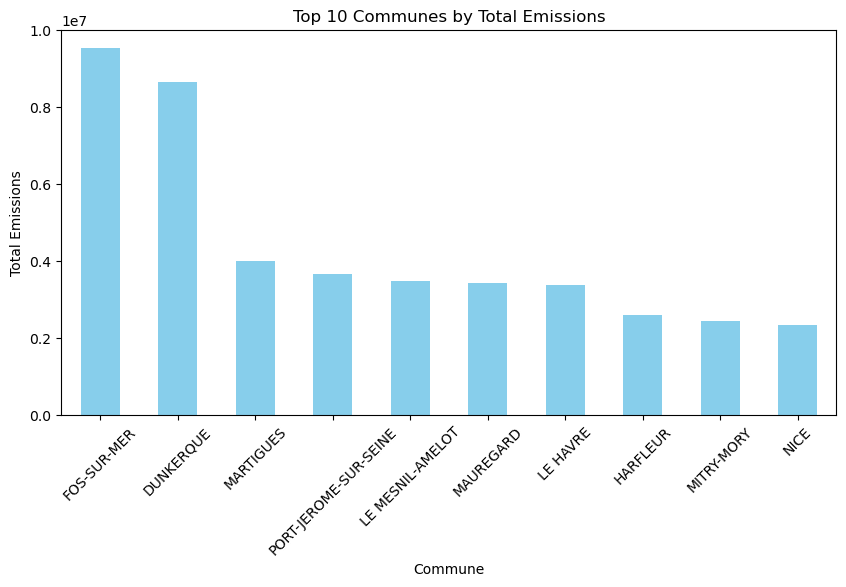

In [6]:
# Calculate total emissions per Communes and sort
top_communes = emissions_communes_df.groupby('commune')['total_emissions'].sum().nlargest(10)

# Plotting
top_communes.plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title('Top 10 Communes by Total Emissions')
plt.ylabel('Total Emissions')
plt.xlabel('Commune')
plt.xticks(rotation=45)
plt.show()


##### Department

In [15]:
# Compute summary statistics for total emissions per department
stats_emissions_department = total_emissions_department.describe()
stats_emissions_department.loc['sum'] = total_emissions_department.sum()  # Total emissions
stats_emissions_department.loc['var'] = total_emissions_department.var()  # Variance
stats_emissions_department.loc['skew'] = total_emissions_department.skew()  # Skewness
stats_emissions_department.loc['kurt'] = total_emissions_department.kurt()  # Kurtosis

print(stats_emissions_department)

       total_emissions
count     9.700000e+01
mean      5.418619e+06
std       4.434520e+06
min       9.469801e+05
25%       3.034841e+06
50%       4.549821e+06
75%       6.071693e+06
max       2.657388e+07
sum       5.256061e+08
var       1.966497e+13
skew      2.991199e+00
kurt      1.086437e+01


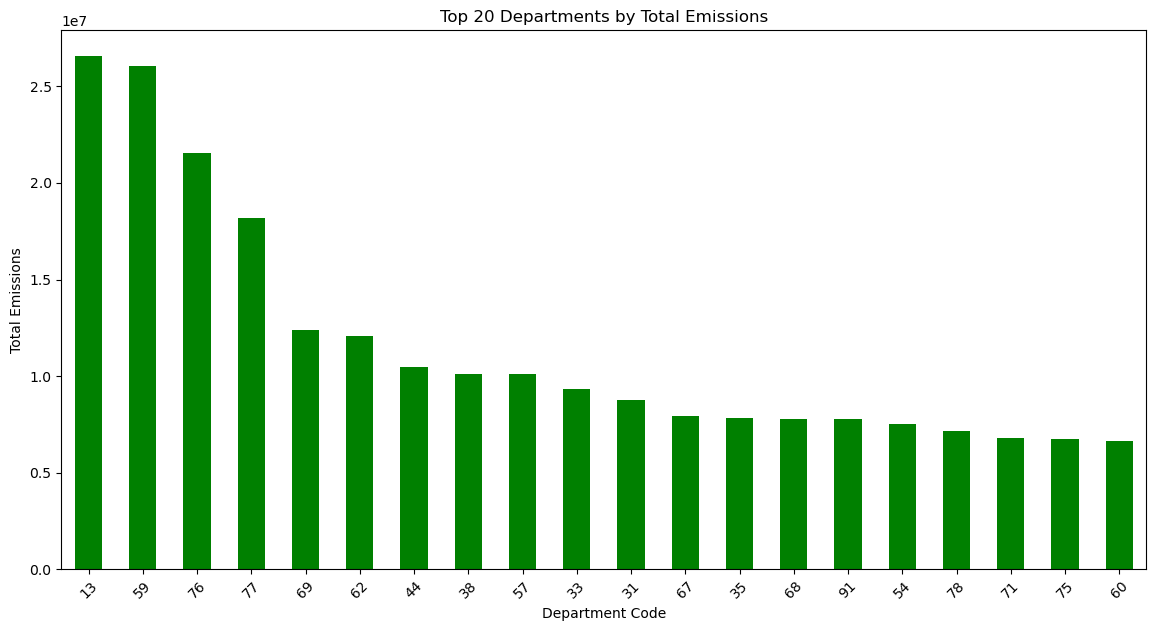

In [16]:
# Calculate total emissions per department and sort to get the top 20
top_20_emissions_department = emissions_communes_df.groupby('departement_code')['total_emissions'].sum().nlargest(20)

# Plotting
top_20_emissions_department.plot(kind='bar', figsize=(14, 7), color='green')
plt.title('Top 20 Departments by Total Emissions')
plt.ylabel('Total Emissions')
plt.xlabel('Department Code')
plt.xticks(rotation=45)
plt.show()


##### Region

In [17]:
# Compute summary statistics for total emissions per region
stats_emissions_region = total_emissions_region.describe()
stats_emissions_region.loc['sum'] = total_emissions_region.sum()  # Total emissions
stats_emissions_region.loc['var'] = total_emissions_region.var()  # Variance
stats_emissions_region.loc['skew'] = total_emissions_region.skew()  # Skewness
stats_emissions_region.loc['kurt'] = total_emissions_region.kurt()  # Kurtosis

print(stats_emissions_region)


       total_emissions
count     1.300000e+01
mean      4.043124e+07
std       1.791052e+07
min       2.649080e+06
25%       2.945009e+07
50%       4.195213e+07
75%       5.537504e+07
max       6.469652e+07
sum       5.256061e+08
var       3.207868e+14
skew     -5.255144e-01
kurt      5.919643e-03


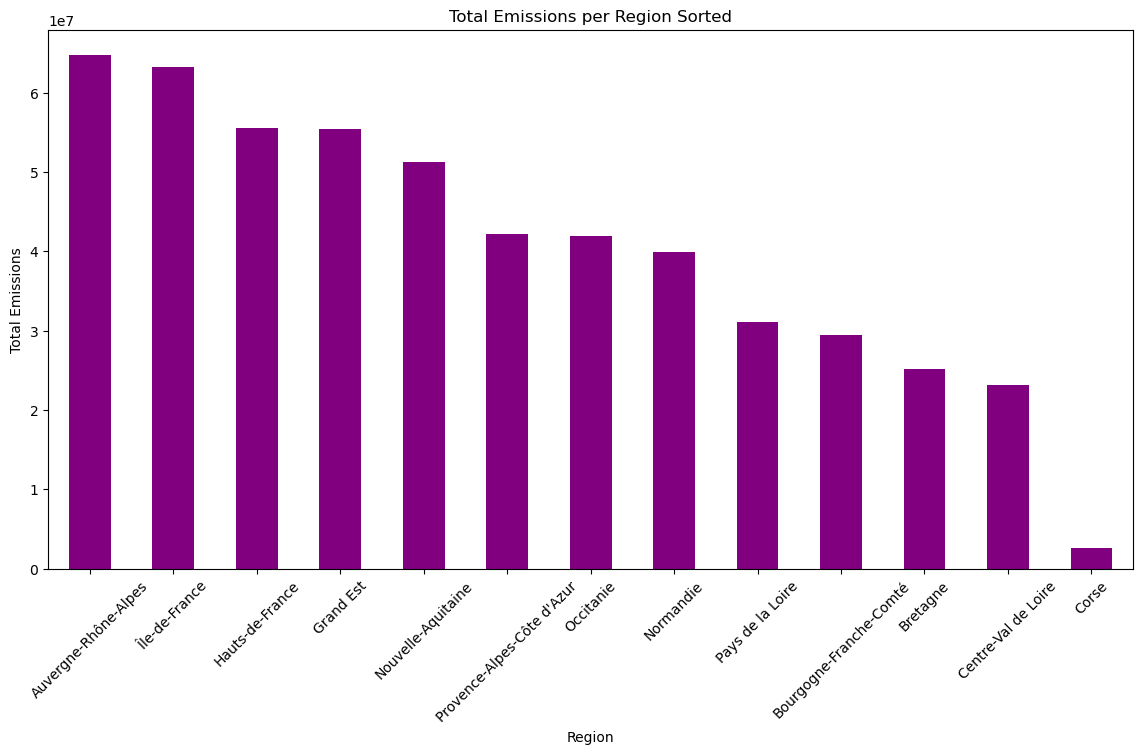

In [18]:
# Calculate total emissions per region and sort
sorted_emissions_region = emissions_communes_df.groupby('region_name')['total_emissions'].sum().sort_values(ascending=False)
# Plotting
sorted_emissions_region.plot(kind='bar', figsize=(14, 7), color='purple')
plt.title('Total Emissions per Region Sorted')
plt.ylabel('Total Emissions')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.show()



#### Population Size per commune, department and region

In [19]:
# Population per 'commune'
population_commune = emissions_communes_df.groupby('commune')[['population_totale']].sum()

# Population per department
population_department = emissions_communes_df.groupby('departement_code')[['population_totale']].sum()

# Population per region
population_region = emissions_communes_df.groupby('region_name')[['population_totale']].sum()


In [12]:
print("Population Per Commune:\n", population_commune)
print("Population Per Department:\n", population_department)
print("Population Per Region:\n", population_region)

Population Per Commune:
                       population_totale
commune                                
AAST                                196
ABAINVILLE                          294
ABANCOURT                          1081
ABAUCOURT                           322
ABAUCOURT-HAUTECOURT                102
...                                 ...
ZUANI                                36
ZUDAUSQUES                         1091
ZUTKERQUE                          1802
ZUYDCOOTE                          1640
ZUYTPEENE                           536

[32515 rows x 1 columns]
Population Per Department:
                   population_totale
departement_code                   
85                           295268
86                           449593
87                           378107
88                           371434
89                           341738
...                             ...
81                           403762
82                           269088
83                          1112053
84   

##### Commune

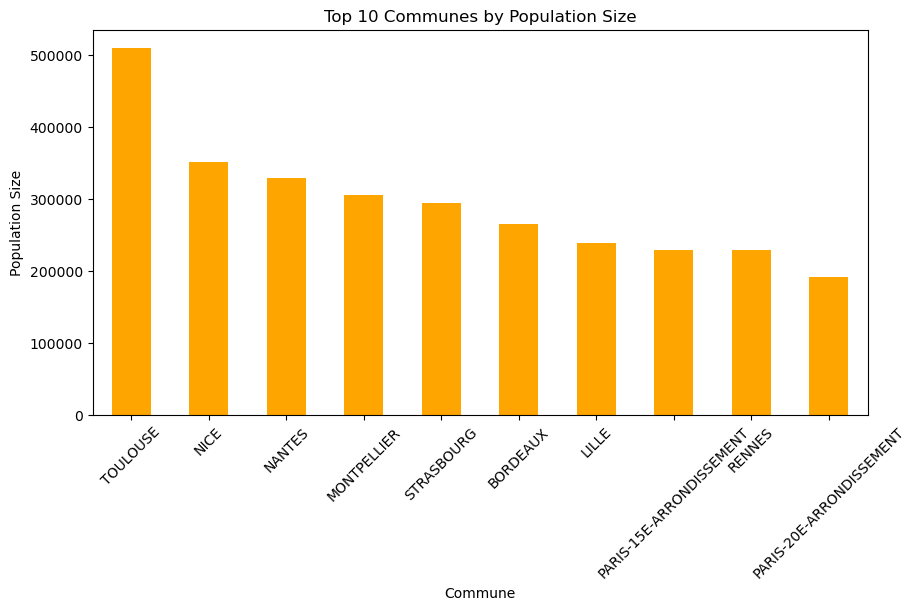

In [22]:
top_population_communes = emissions_communes_df.groupby('commune')['population_totale'].sum().nlargest(10)
top_population_communes.plot(kind='bar', figsize=(10, 5), color='orange')
plt.title('Top 10 Communes by Population Size')
plt.ylabel('Population Size')
plt.xlabel('Commune')
plt.xticks(rotation=45)
plt.show()


##### Department

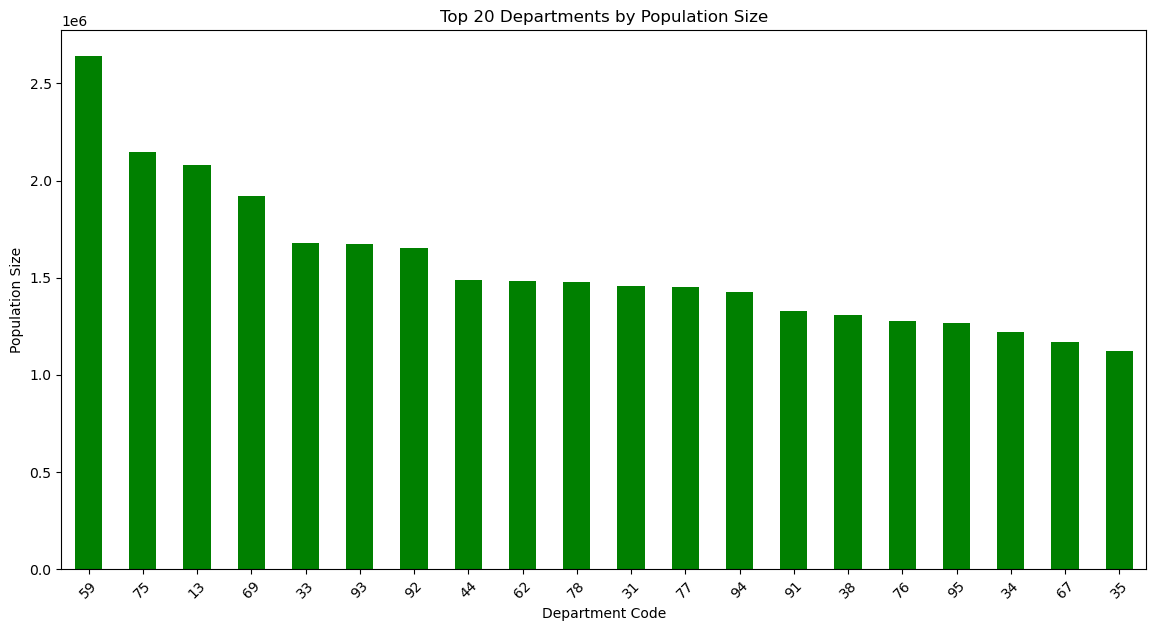

In [25]:
top_population_department = emissions_communes_df.groupby('departement_code')['population_totale'].sum().nlargest(20)
top_population_department.plot(kind='bar', figsize=(14, 7), color='green')
plt.title('Top 20 Departments by Population Size')
plt.ylabel('Population Size')
plt.xlabel('Department Code')
plt.xticks(rotation=45)
plt.show()


##### Region

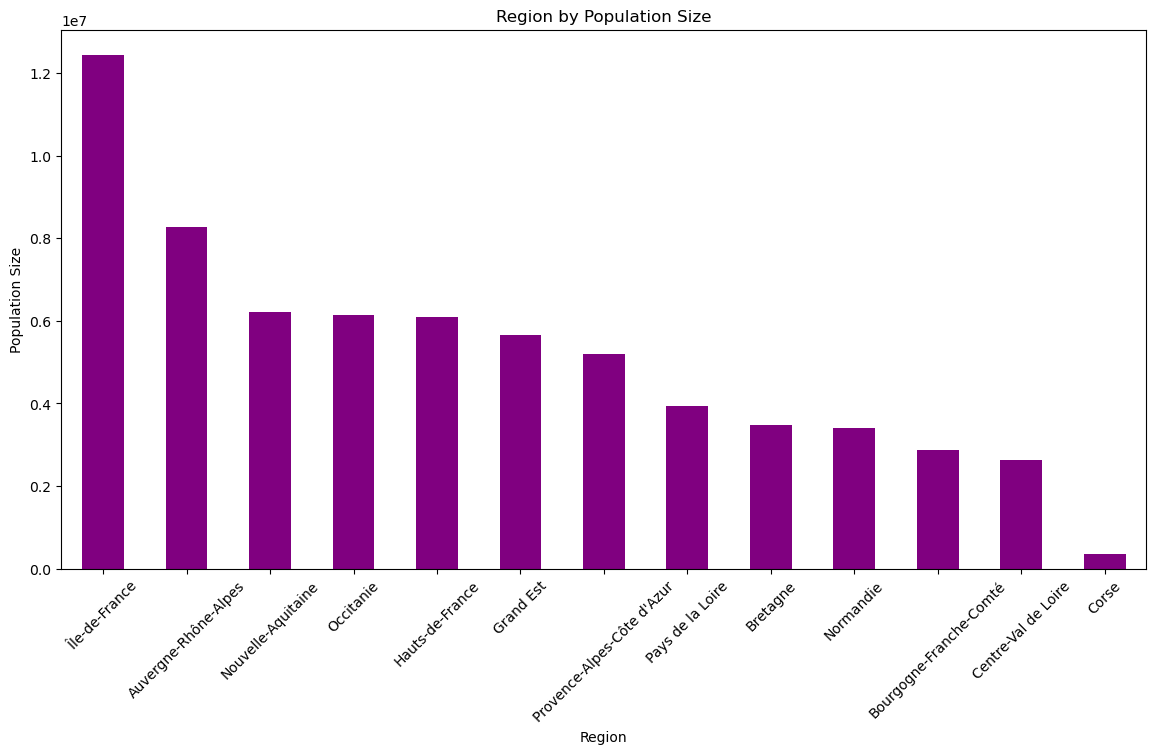

In [27]:
top_population_region = emissions_communes_df.groupby('region_name')['population_totale'].sum().sort_values(ascending=False)
top_population_region.plot(kind='bar', figsize=(14, 7), color='purple')
plt.title('Region by Population Size')
plt.ylabel('Population Size')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.show()

**Insights:** 
The result is that population size, in particular, at larger aggregations such as departments and regions, looks directly related to total emissions from increased industrial activity and higher energy use due to larger populations in some places (deeper statistical analysis could of course be used). This is not the case at the commune level. Smaller communes do not contain populations within the top yet—like Fos-sur-Mer and Dunkerque—but reflect astoundingly high emissions. This fact has been contributed to by great industrial activity taking place in these communes, such as oil refinery and steelworks, which do much to contribute to their emissions. This does, however, draw attention to the fact that local industrial activities have a large effect on the emissions data, hence reinforcing the fact that environmental policies based on such data are to be effective if they take into consideration population density and the profiles of these industries.

#### Total emissions per type of Emitter

In [8]:
# List all emission type columns
emission_types = ['agriculture', 'transports', 'transports_international', 'biomasse_co2_hors_total', 'déchets', 'energie', 'industrie_hors_énergie', 'résidentiel', 'routier', 'tertiaire']

# Total emissions per type
total_emissions_by_type = emissions_communes_df[emission_types].sum()


In [15]:
print("Total Emissions Per Type of Emitter:\n", total_emissions_by_type)

Total Emissions Per Type of Emitter:
 agriculture                 8.544790e+07
transports                  6.512007e+06
transports_international    2.223786e+07
biomasse_co2_hors_total     6.303789e+07
déchets                     1.452226e+07
energie                     2.282043e+07
industrie_hors_énergie      8.340319e+07
résidentiel                 6.344550e+07
routier                     1.249358e+08
tertiaire                   3.924325e+07
dtype: float64


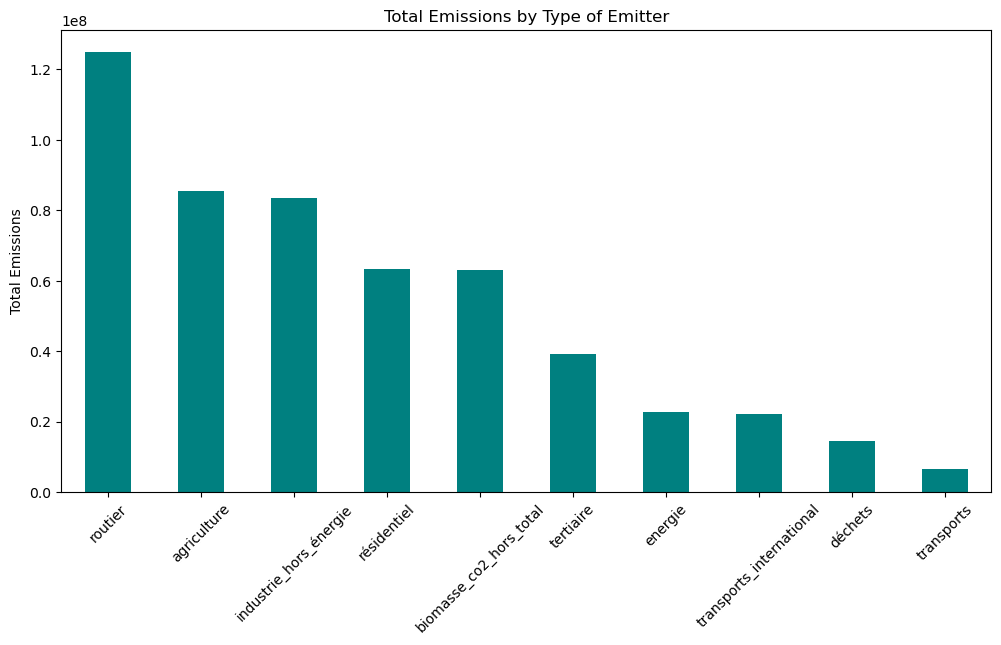

In [29]:
total_emissions_by_type = emissions_communes_df[['agriculture', 'transports', 'transports_international', 'biomasse_co2_hors_total', 'déchets', 'energie', 'industrie_hors_énergie', 'résidentiel', 'routier', 'tertiaire']].sum().sort_values(ascending=False)
total_emissions_by_type.plot(kind='bar', figsize=(12, 6), color='teal')
plt.title('Total Emissions by Type of Emitter')
plt.ylabel('Total Emissions')
plt.xticks(rotation=45)
plt.show()


#### Total emissions for transports

In [9]:
# Total emissions for all transports
total_transports_emissions = emissions_communes_df[['transports', 'transports_international']].sum().sum()


In [16]:
print("Total Emissions for All Transports: ", total_transports_emissions)


Total Emissions for All Transports:  28749864.811904382


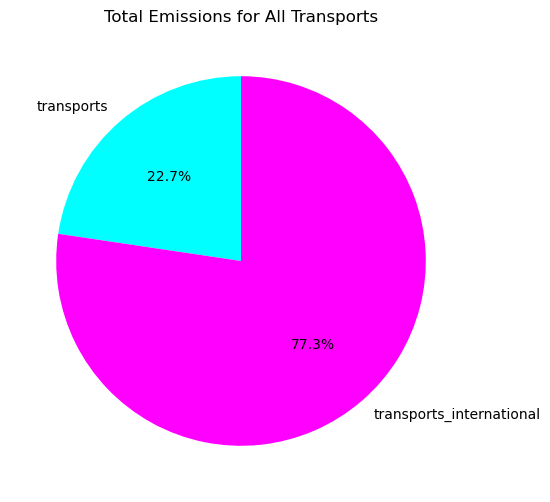

In [30]:
transport_emissions = emissions_communes_df[['transports', 'transports_international']].sum()
transport_emissions.plot(kind='pie', figsize=(6, 6), autopct='%1.1f%%', startangle=90, colors=['cyan', 'magenta'])
plt.title('Total Emissions for All Transports')
plt.ylabel('') 
plt.show()


**Insights:**
This data is indicative of the fact that the road, agriculture, and non-energy industrial sectors of the economy represent important sources for these emissions and would thus be key targets under most mitigation strategies. On the other hand, this underscores an important share of the emissions from international transport, likely requiring efforts to reduce the emissions of these really worldwide activities via improvements in fuel efficiency and cleaner technologies, if compared to local transport.

### 1-2 Provide statistics on emissions per person  
Compute the statistics of emissions per person, i-e the total emissions (in tons of GHG) for 1 person
- at the commune level
- at the department level
- at the region level

First, we compute the total emissions and population per commune, department and region

In [20]:
# Replace zeros in 'population_totale' with NaN to avoid division by zero
emissions_communes_df['population_totale'].replace(0, np.nan, inplace=True)

# Recalculate aggregates if zero populations are replaced with NaN
commune_aggregates = emissions_communes_df.groupby('commune').agg({
    'total_emissions': 'sum',
    'population_totale': 'sum'
})
department_aggregates = emissions_communes_df.groupby('departement_code').agg({
    'total_emissions': 'sum',
    'population_totale': 'sum'
})
region_aggregates = emissions_communes_df.groupby('region_name').agg({
    'total_emissions': 'sum',
    'population_totale': 'sum'
})

# Compute emissions per person again, handling NaN values
commune_aggregates['emissions_per_person'] = commune_aggregates['total_emissions'] / commune_aggregates['population_totale']
department_aggregates['emissions_per_person'] = department_aggregates['total_emissions'] / department_aggregates['population_totale']
region_aggregates['emissions_per_person'] = region_aggregates['total_emissions'] / region_aggregates['population_totale']


Then, we can compute emissions per person

In [21]:
# Compute emissions per person for each commune
commune_aggregates['emissions_per_person'] = commune_aggregates['total_emissions'] / commune_aggregates['population_totale']

# Compute emissions per person for each department
department_aggregates['emissions_per_person'] = department_aggregates['total_emissions'] / department_aggregates['population_totale']

# Compute emissions per person for each region
region_aggregates['emissions_per_person'] = region_aggregates['total_emissions'] / region_aggregates['population_totale']


In [22]:
# Check for infinite values and replace them with NaN
commune_aggregates.replace([np.inf, -np.inf], np.nan, inplace=True)
department_aggregates.replace([np.inf, -np.inf], np.nan, inplace=True)
region_aggregates.replace([np.inf, -np.inf], np.nan, inplace=True)

# Optionally, we could drop these rows if NaN is not suitable

In [23]:
print("Emissions Per Person at the Commune Level:\n", commune_aggregates['emissions_per_person'])
print("Emissions Per Person at the Department Level:\n", department_aggregates['emissions_per_person'])
print("Emissions Per Person at the Region Level:\n", region_aggregates['emissions_per_person'])


Emissions Per Person at the Commune Level:
 commune
AAST                     9.632894
ABAINVILLE              28.063353
ABANCOURT                5.849626
ABAUCOURT               10.505949
ABAUCOURT-HAUTECOURT    62.983622
                          ...    
ZUANI                   20.186957
ZUDAUSQUES               4.426689
ZUTKERQUE                6.280639
ZUYDCOOTE                3.994530
ZUYTPEENE                9.544640
Name: emissions_per_person, Length: 32515, dtype: float64
Emissions Per Person at the Department Level:
 departement_code
85     7.008674
86     8.944706
87    10.711659
88     9.793533
89     9.953272
        ...    
81     7.608124
82     7.181841
83     3.867675
84     5.237947
85     8.038617
Name: emissions_per_person, Length: 97, dtype: float64
Emissions Per Person at the Region Level:
 region_name
Auvergne-Rhône-Alpes           7.809664
Bourgogne-Franche-Comté       10.252833
Bretagne                       7.225157
Centre-Val de Loire            8.785416
Corse 

Summary statistics:

In [24]:
commune_stats = commune_aggregates['emissions_per_person'].describe()
commune_stats['median'] = commune_aggregates['emissions_per_person'].median()
commune_stats['var'] = commune_aggregates['emissions_per_person'].var()  # Variance
commune_stats['skew'] = commune_aggregates['emissions_per_person'].skew()  # Skewness
commune_stats['kurt'] = commune_aggregates['emissions_per_person'].kurt()  # Kurtosis
print("Summary Statistics for Emissions Per Person at the Commune Level:\n", commune_stats)


Summary Statistics for Emissions Per Person at the Commune Level:
 count     32509.000000
mean         14.954841
std          59.677733
min           0.990213
25%           5.999565
50%           9.808048
75%          16.939571
max        9504.998409
median        9.808048
var        3561.431868
skew        130.101006
kurt      20001.431170
Name: emissions_per_person, dtype: float64


In [25]:
department_stats = department_aggregates['emissions_per_person'].describe()
department_stats['median'] = department_aggregates['emissions_per_person'].median()
department_stats['var'] = department_aggregates['emissions_per_person'].var()  # Variance
department_stats['skew'] = department_aggregates['emissions_per_person'].skew()  # Skewness
department_stats['kurt'] = department_aggregates['emissions_per_person'].kurt()  # Kurtosis
print("Summary Statistics for Emissions Per Person at the Department Level:\n", department_stats)


Summary Statistics for Emissions Per Person at the Department Level:
 count     97.000000
mean       8.932205
std        3.225707
min        3.131565
25%        7.008674
50%        8.276684
75%       10.398493
max       19.550053
median     8.276684
var       10.405185
skew       0.838900
kurt       0.873490
Name: emissions_per_person, dtype: float64


In [26]:
region_stats = region_aggregates['emissions_per_person'].describe()
region_stats['median'] = region_aggregates['emissions_per_person'].median()
region_stats['var'] = region_aggregates['emissions_per_person'].var()  # Variance
region_stats['skew'] = region_aggregates['emissions_per_person'].skew()  # Skewness
region_stats['kurt'] = region_aggregates['emissions_per_person'].kurt()  # Kurtosis
print("Summary Statistics for Emissions Per Person at the Region Level:\n", region_stats)


Summary Statistics for Emissions Per Person at the Region Level:
 count     13.000000
mean       8.338951
std        1.671851
min        5.086056
25%        7.513862
50%        8.098906
75%        9.121883
max       11.755809
median     8.098906
var        2.795087
skew       0.218290
kurt       0.902922
Name: emissions_per_person, dtype: float64


For plotting:

In [27]:
# Top 15 communes by emissions per person
top15_communes = commune_aggregates.sort_values(by='emissions_per_person', ascending=False).head(15)

# Top 15 departments by emissions per person
top15_departments = department_aggregates.sort_values(by='emissions_per_person', ascending=False).head(15)

# Top 15 regions by emissions per person
top15_regions = region_aggregates.sort_values(by='emissions_per_person', ascending=False).head(15)


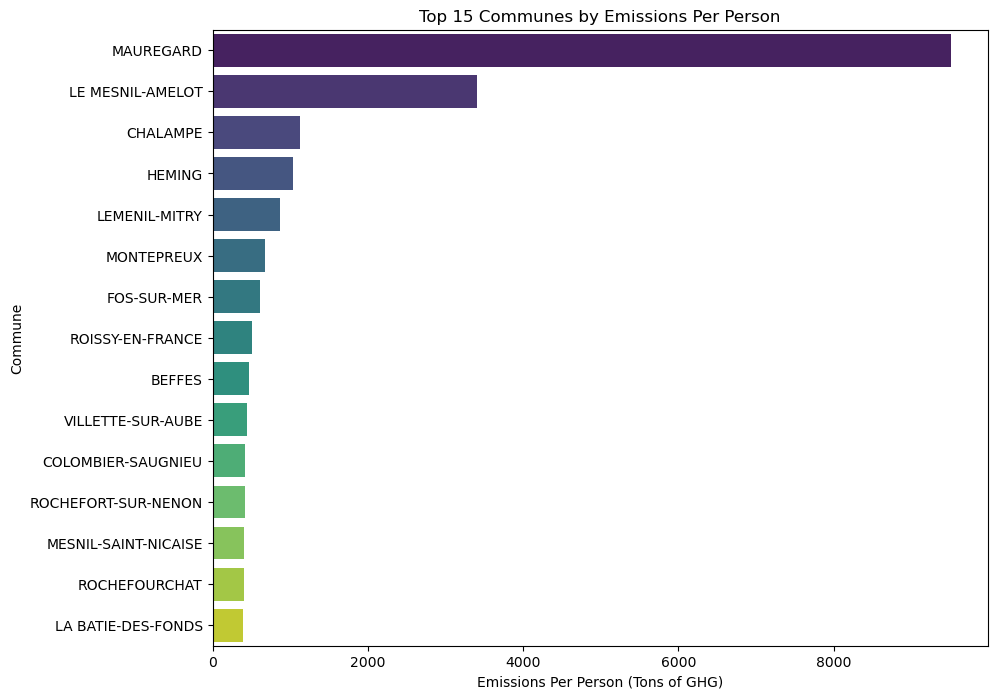

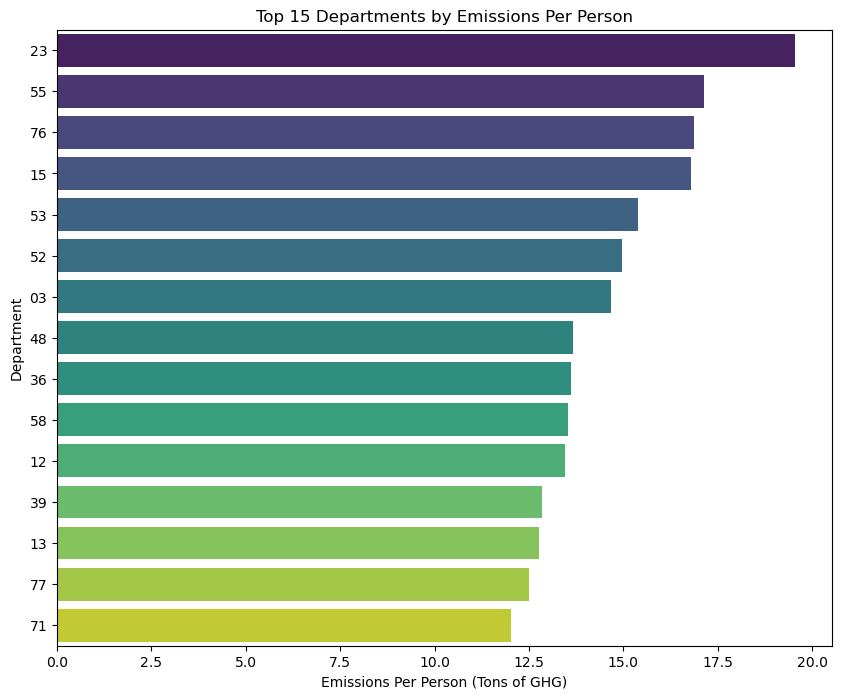

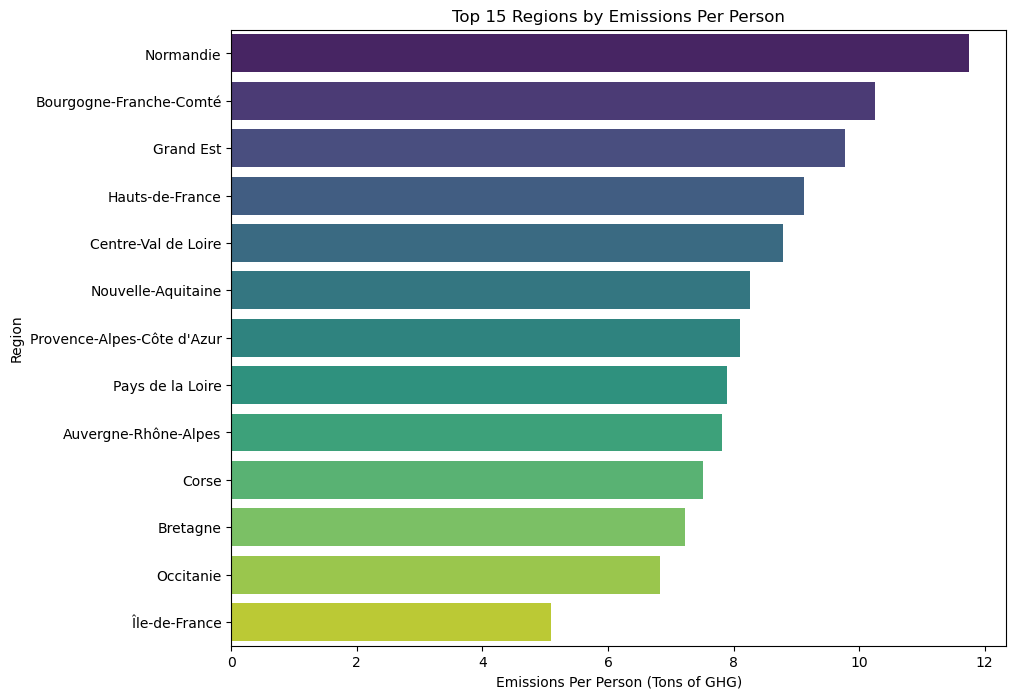

In [28]:
plt.figure(figsize=(10, 8))
sns.barplot(x=top15_communes['emissions_per_person'], y=top15_communes.index, palette='viridis')
plt.title('Top 15 Communes by Emissions Per Person')
plt.xlabel('Emissions Per Person (Tons of GHG)')
plt.ylabel('Commune')
plt.show()

plt.figure(figsize=(10, 8))
sns.barplot(x=top15_departments['emissions_per_person'], y=top15_departments.index, palette='viridis')
plt.title('Top 15 Departments by Emissions Per Person')
plt.xlabel('Emissions Per Person (Tons of GHG)')
plt.ylabel('Department')
plt.show()

plt.figure(figsize=(10, 8))
sns.barplot(x=top15_regions['emissions_per_person'], y=top15_regions.index, palette='viridis')
plt.title('Top 15 Regions by Emissions Per Person')
plt.xlabel('Emissions Per Person (Tons of GHG)')
plt.ylabel('Region')
plt.show()


**Insights:**

Summary statistics about emissions at a per-person scale show a contrasting difference of the emissions between the two scales. The commune scale presented a high difference in variance of emissions between each person and important standard deviation, signaling large differences. The extreme maximum value and the high skewness signal notably the outliers. Thus, communes such as Mauregard, Le Mesnil-Amelot, and Chalampe present very high emissions, which might be accountable for industrial activities or a small population and large per-capita greenhouse gas sources.

The skewness and dispersion at the department and region levels are, respectively, much lower. This indicates a higher smoothness level in the distribution of emissions per person. In that context, at an even bigger scale than the regional one, the analysis of emissions would further mitigate the effect of individual outliers and align the variations in emissions with variations in population.

This, of course, underlines that the distribution is hugely complex and hence influenced by very local factors. Effective environmental policy, therefore, must look across these broad trends to the specific circumstances of outliers in communes.